In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats.distributions import chi2
from os import listdir
import matplotlib as mpl
%matplotlib inline

new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none'
    }
mpl.rcParams.update(new_rc_params)

In [18]:
#Simulated Probability Distribution over States
probs = np.linspace(0, 1., 1000)
simulated_probs = np.random.choice(probs, size = len(States), replace = True)

In [20]:
import election
%load_ext autoreload
%autoreload 2

In [57]:
#Monte Carlo simulation
runs = 100000
test = election.montecarlo(runs, simulated_probs)

  0%|          | 0/100000 [00:00<?, ?it/s]

18.895% Chance of Winning


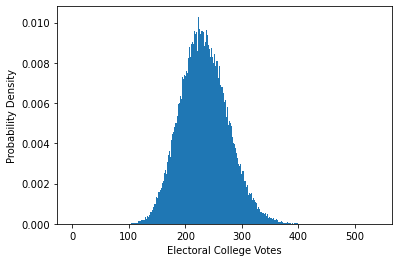

In [65]:
bins = np.linspace(0, 538, 539)
plt.hist(test, bins, density = True)
plt.xlabel('Electoral College Votes')
plt.ylabel('Probability Density')

victory = 0
for i in range(len(test)):
    if test[i] >= 270:
        victory += 1
victory /= len(test)
print(str(victory * 100) + '% Chance of Winning')

In [62]:
test2 = election.montecarlo(runs, 1 - simulated_probs)

  0%|          | 0/100000 [00:00<?, ?it/s]

80.303% Chance of Winning


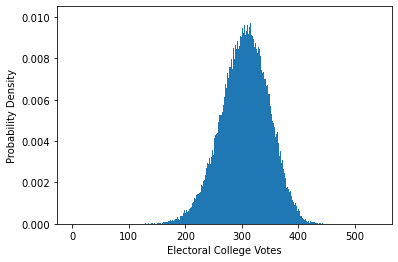

In [64]:
bins = np.linspace(0, 538, 539)
plt.hist(test2, bins, density = True)
plt.xlabel('Electoral College Votes')
plt.ylabel('Probability Density')

victory2 = 0
for i in range(len(test2)):
    if test2[i] >= 270:
        victory2 += 1
victory2 /= len(test2)
print(str(victory2 * 100) + '% Chance of Winning')